In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics,preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [2]:
df=pd.read_csv(r'C:\Personal\Personal\Research papers all\In Process\anemia.csv')

In [3]:
# Split the data into X and y
X = df.drop('Result', axis=1) # Drop the 'Result' column as it's the target variable
y = df['Result']

# Print the shape of X and y to verify the split
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1421, 5)
Shape of y: (1421,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

knn_acc = accuracy_score(y_test, pred_knn)
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")
print(f"Confusion Matrix for KNN:\n{confusion_matrix(y_test, pred_knn)}\n")
print(f"Classification Report for KNN:\n{classification_report(y_test, pred_knn)}\n")

# Train and evaluate Logistic Regression classifier
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
pred_l = logistic.predict(X_test)

l_acc = accuracy_score(y_test, pred_l)
print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, logistic.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {l_acc} \n")
print(f"Confusion Matrix for Logistic Regression:\n{confusion_matrix(y_test, pred_l)}\n")
print(f"Classification Report for Logistic Regression:\n{classification_report(y_test, pred_l)}\n")

# Train and evaluate SVM classifier
svm1 = svm.SVC(gamma="auto",C=10,kernel="rbf",probability=True)
svm1.fit(X_train,y_train)
pred_s = svm1.predict(X_test)

svm1_acc = accuracy_score(y_test, pred_s)
print(f"Training Accuracy of SVM is {accuracy_score(y_train, svm1.predict(X_train))}")
print(f"Test Accuracy of SVM is {svm1_acc} \n")
print(f"Confusion Matrix for SVM:\n{confusion_matrix(y_test, pred_s)}\n")
print(f"Classification Report for SVM:\n{classification_report(y_test, pred_s)}\n")

# Train and evaluate Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_n = gnb.predict(X_test)

gnb_acc = accuracy_score(y_test, pred_n)
print(f"Training Accuracy of Naive Bayes is {accuracy_score(y_train, gnb.predict(X_train))}")
print(f"Test Accuracy of Naive Bayes is {gnb_acc} \n")
print(f"Confusion Matrix for Naive Bayes:\n{confusion_matrix(y_test, pred_n)}\n")
print(f"Classification Report for Naive Bayes:\n{classification_report(y_test, pred_n)}\n")

# Train and evaluate LightGBM classifier
lgbm = LGBMClassifier(learning_rate=1)
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_test)

lgbm_acc = accuracy_score(y_test, pred_lgbm)
print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")
print(f"Confusion Matrix for LGBM Classifier is:\n{confusion_matrix(y_test, pred_n)}\n")
print(f"Classification Report for LGBM Classifier is:\n{classification_report(y_test, pred_n)}\n")



Training Accuracy of KNN is 0.9346076458752515
Test Accuracy of KNN is 0.8805620608899297 

Confusion Matrix for KNN:
[[219  26]
 [ 25 157]]

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       245
           1       0.86      0.86      0.86       182

    accuracy                           0.88       427
   macro avg       0.88      0.88      0.88       427
weighted avg       0.88      0.88      0.88       427


Training Accuracy of Logistic Regression is 0.9929577464788732
Test Accuracy of Logistic Regression is 0.990632318501171 

Confusion Matrix for Logistic Regression:
[[241   4]
 [  0 182]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       245
           1       0.98      1.00      0.99       182

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99  

In [5]:
from sklearn.ensemble import VotingClassifier

# Instantiate the individual models
knn = KNeighborsClassifier()
logistic = LogisticRegression()
svm1 = svm.SVC(gamma="auto",C=10,kernel="rbf",probability=True)
gnb = GaussianNB()
lgbm = LGBMClassifier(learning_rate=1)

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('logistic', logistic),
    ('svm', svm1),
    ('gnb', gnb),
    ('lgbm', lgbm)],
    voting='soft')

# Train the voting classifier on the training set
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier on the test set
y_pred = voting_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9976580796252927
Confusion Matrix:
 [[244   1]
 [  0 182]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       0.99      1.00      1.00       182

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



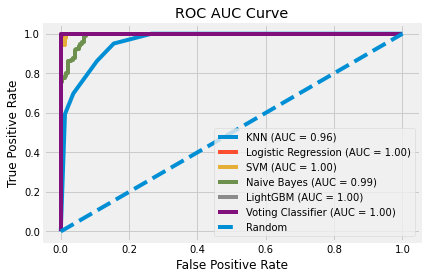

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC AUC curve for KNN
knn.fit(X_train, y_train)
knn_probs = knn.predict_proba(X_test)[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# ROC AUC curve for Logistic Regression
logistic.fit(X_train,y_train)
lr_probs = logistic.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# ROC AUC curve for SVM
svm1.fit(X_train,y_train)
svm_probs = svm1.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# ROC AUC curve for Naive Bayes
gnb.fit(X_train,y_train)
nb_probs = gnb.predict_proba(X_test)[:, 1]
nb_auc = roc_auc_score(y_test, nb_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

# ROC AUC curve for LightGBM
lgbm.fit(X_train, y_train)
lgbm_probs = lgbm.predict_proba(X_test)[:, 1]
lgbm_auc = roc_auc_score(y_test, lgbm_probs)
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_probs)

# ROC AUC curve for Voting Classifier
voting_probs = voting_clf.predict_proba(X_test)[:, 1]
voting_auc = roc_auc_score(y_test, voting_probs)
voting_fpr, voting_tpr, _ = roc_curve(y_test, voting_probs)

# plot the ROC AUC curves
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % knn_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.plot(lgbm_fpr, lgbm_tpr, label='LightGBM (AUC = %0.2f)' % lgbm_auc)
plt.plot(voting_fpr, voting_tpr, label='Voting Classifier (AUC = %0.2f)' % voting_auc)

# plot the random curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')

# set the plot properties
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()

# show the plot
plt.show()
